# Frequentist and Bayesian Learning for Binomial Distribution

In this notebook our goal is to understand the **Frequentist** and **Bayesian** Learning for binomial distribution. In particular, we will go through the following topics.

1. Compute the binomial distribution probability mass function (pmf)
2. Create and play with the Beta distribution (used to model the conjugate prior)
3. Learn the unknown model parameter of a binomial distribution using Frequentist and Bayesian learning approach

We will use a simple coin toss scenario to model binomial distribution. We will assume that we performed multiple trials of coin toss and recorded the observations (number of heads and tails). We will also assume that these observations are generated by some unknown binomial distribution that is governed by the parameter $\theta$. Here $\theta$ represents the probability of observing heads. We will estimate the value of $\theta$ by using both the frequentist and Bayesian learning.

We will investigate the following questions.
1. When does the frequentist learning provide us an optimal estimate of $\theta$?
2. How does the Bayesian learning overcome the limitation of the frequentist learning?
3. How do we model our prior assumptions about $\theta$ by using the conjugate prior Beta distribution?
4. How does our prior assumptions change the frequentist estimate of $\theta$ and enable us to create a better estimate?
5. How do we model the uncertainty of the posterior distribution?
6. How do we reduce uncertainty of the posterior distribution?


In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binom, beta

## Binomial Distribution for Coin Flips

We learn how to compute the probability mass function (pmf) for the binomial distribution.

We use the **scipy.stats.binom** function for this purpose. This function computes the binomial pmf based on three parameters.

- $k$: number of observed heads
- $n$: number of coin flips (trials)
- $p$: probability of observing heads

Note that $k$ should be between $0$ to $n$.

Number of possible heads in 10 trials: 
[ 0  1  2  3  4  5  6  7  8  9 10]

Probability of generating the number of heads from 0 to 10: 
0 - 0.0282
1 - 0.1211
2 - 0.2335
3 - 0.2668
4 - 0.2001
5 - 0.1029
6 - 0.0368
7 - 0.0090
8 - 0.0014
9 - 0.0001
10 - 0.0000


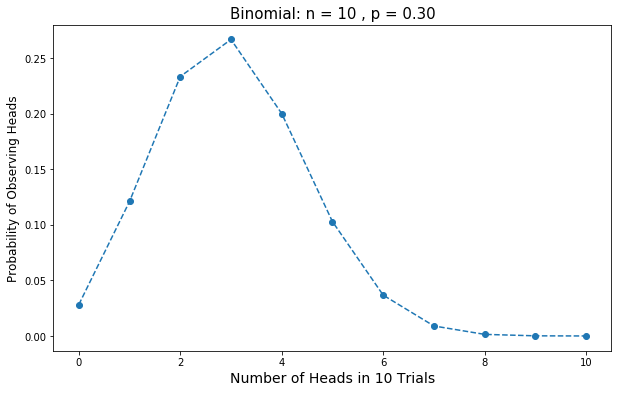

In [2]:
# Binomial Distribution for coin flips
# Generate the Binomial Distribution PMF


n = 10    # No. of coin flips
p = 0.3   # Probability of observing head

# Possible no. of heads observed after the flip starting from 0 
# Example: k = 0 if head was not observed in n trials
k = np.arange(0, n+1)  

# Generate the binomial distribution pmf
binomial = binom.pmf(k, n, p)

print("Number of possible heads in %d trials: " % n)
print(k)

print("\nProbability of generating the number of heads from 0 to %d: " % n)
for i, j in zip(k, k):
    print("%d - %.4f" % (i, binomial[j]))


plt.figure(figsize=(10, 6))
plt.plot(k, binomial, 'o--')
plt.title('Binomial: n = %i , p = %.2f' % (n, p), fontsize = 15)
plt.xlabel('Number of Heads in %i Trials' % n, fontsize = 14)
plt.ylabel('Probability of Observing Heads', fontsize = 12)
plt.show()

# Beta Distribution

We will learn how to create the Beta distribution.

A Beta distribution is used as a **conjugate prior** for the binary distribution. It is controlled by two hyperparameters:
- $a$ (shape)
- $b$ (rate)

Beta distributions are used to model our prior assumptions about the model parameter $\theta$. 

For example, say that we have collected data from multiple coin tosses. We want to estimate the probability distribution that created the observations. The binary probability distribution of coin tosses is governed by a single parameter $\theta$ that represents that probability of observing head. We use the Beta distribution to model our assumption (prior belief) about $\theta$. We might have reasons to believe that the coin is strongly biased towards heads or tails, or both, or none. We can capture these assumptions about $\theta$ by varying the two hyperparameters $a$ and $b$ of the Beta distribution. 

Below we model various assumptions using the Beta distribution.

- First, we create a single Beta distribution by using fixed values of $a$ and $b$.

- Then, we create multiple Beta distributions by varying their $a$ and $b$ values.

## Generate a Single Beta Distribution

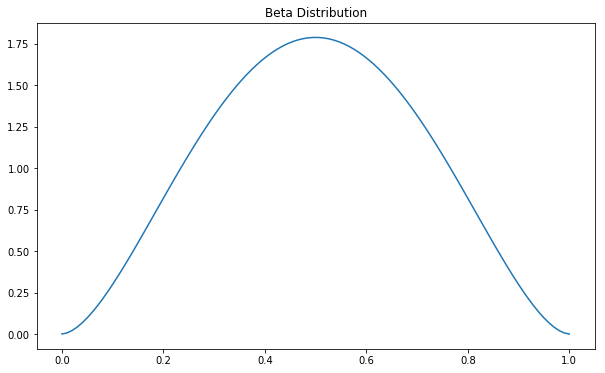

In [3]:
# Single Beta Distribution

# Parameters for Beta distribution
a = 2.75     # Shape
b = 2.75     # Rate


# Generate 100 points (real numbers) between 0 and 1
x = np.linspace(0, 1.0, 100)

# Compute the density of these points using the Beta distribution's pdf function
y = beta.pdf(x, a, b)


plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.title("Beta Distribution")
plt.show()

## Generate Multiple Beta Distributions by Varying Its Parameters

Our goal is to model **four prior assumptions** about the model parameter $\theta$.
- Assumption 1: we don't know whether the coin is biased towards heads or tails. Thus, we assume that $\theta$ has a uniform distribution (represented by yellow line)
- Assumption 2: the coin could be biased towards either heads or tails (bimodal distribution), so we want two peaks at the two corners of the distribution (represented by red line)
- Assumption 3: the coin could be biased towards tails (unimodal distribution), so we want a single peak at the left corner of the distribution (represented by green line)
- Assumption 4: the coin could be biased towards heads (unimodal distribution), so we want a single peak at the right corner of the distribution (represented by blue line)

**Carefully observe** how to vary the parameters $a$ and $b$ to capture the above assumptions.

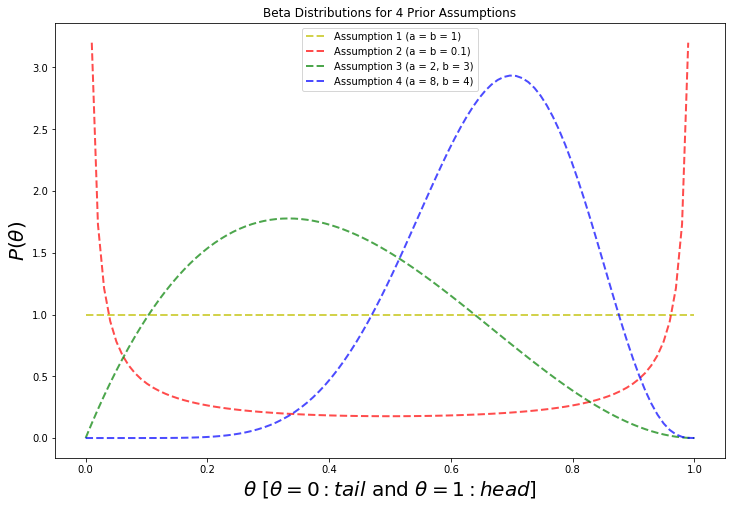

In [5]:
# Multiple Beta Distributions


# Generate 100 points (real numbers) between 0 and 1
x = np.linspace(0, 1.0, 100)


# Compute the density of these points using the various Beta distributions
y1 = beta.pdf(x, 1.0, 1.0)  # Uniform Distribution  a = 1 & b = 1
y2 = beta.pdf(x, 0.1, 0.1)  # Bimodal Distribution  a < 1 & b < 1
y3 = beta.pdf(x, 2.0, 3.0)  # Unimodal Distribution a > 1 & b > 1
y4 = beta.pdf(x, 8.0, 4.0)  # Unimodal Distribution a > 1 & b > 1


plt.figure(figsize=(12, 8))

plt.plot(x, y1, "y--", lw=2, alpha=0.7, label='Assumption 1 (a = b = 1)')
plt.plot(x, y2, "r--", lw=2, alpha=0.7, label='Assumption 2 (a = b = 0.1)')
plt.plot(x, y3, "g--", lw=2, alpha=0.7, label='Assumption 3 (a = 2, b = 3)')
plt.plot(x, y4, "b--", lw=2, alpha=0.7, label='Assumption 4 (a = 8, b = 4)')
plt.legend(loc='best',frameon=True)
plt.xlabel(r"$\theta$ [$\theta = 0: tail$ and $\theta = 1: head$]", fontsize=20)
plt.ylabel(r"$P(\theta)$", fontsize=20)
plt.title("Beta Distributions for 4 Prior Assumptions")
plt.show()

# Frequentist and Bayesian Learing for Binomial Distribution (Coin Flip Scenario)

### Coin Flip Scenario

We flip a coin multiple times and count the number heads and tails. 

We assume that the distribution of the heads and tails are governed by an unknown parameter $\theta$.

We learn this $\theta$ by using:
- Frequentist approach
- Bayesian approach



### Frequentist Learning

In the frequentist learing we assume that there exists a true model (a fixed value for $\theta$). The frequentist approach (Maximum Likelihood Estimation or MLE) gives us an estimate for the true $\theta$. To get a good (optimal) estimate, we need infinite number of samples. Otherwise MLE doesn't provide an optimal estimate.

We compute the MLE of the distribution as follows.

$\theta_{MLE} = \frac{\#heads}{\#heads + \#tails}$ 

### Bayesian Learning

In the Bayesian learning we assume that the model parameter $\theta$ is a random variable (unlike the frequentist learning). We use a prior distribution of the $\theta$ and construct the likelihood function for the data $D$ as $p(D | \theta)$. Then, using the Bayes' rule we compute the posterior distribution of $\theta$ as follows:

$p(\theta | D) \propto p(D | \theta) * p(\theta)$

To perform a Bayesian analysis we use the Beta distribution as the conjugate prior. A conjugate prior has the same functional form as the likelihood function $p(D | \theta)$.


#### Mode of the Posterior (MAP):
We compute the mode of the posterior distribution which is known as the maximum a posteriori (MAP) estimate as follows. 

$\theta_{MAP} = \frac{\#heads + a -1}{\#heads + \#tails + a + b -2}$

#### Mean of the Posterior:

We compute the mean of the posterior distribution as follows.

$\overline{\theta} = \frac{\#heads + a}{\#heads + \#tails + a + b}$


#### Error Bar for the Posterior Distribution

We compute the standard deviation or error bar for the posterior distribution as follows.

$\sigma = \sqrt(\frac{(\theta_{MLE})(1 - \theta_{MLE})}{n})$

Note that the standard deviation formula is valid only when $n >> a, b$



--------------- Frequentist Learning: ---------------

Theta (MLE): 0.900000

--------------- Bayesian Learning: ---------------

Theta (MAP): 0.900000

Theta (posterior) Mean: 0.892157

Bayesian Analysis: Error Bar or Standard Deviation

Theta (posterior) Standard Deviation: 0.030000


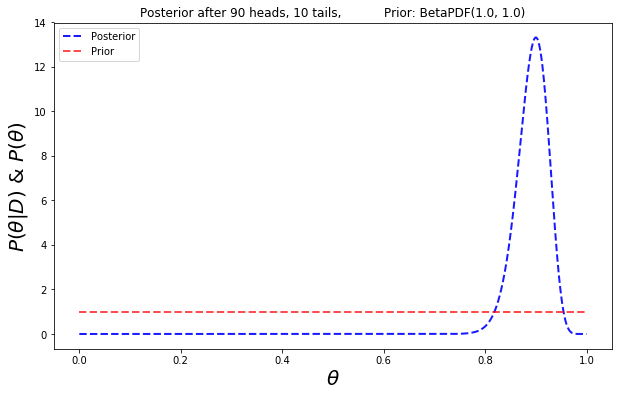

In [11]:
# Frequentist and Bayesian Learing for Binomial Distribution (Coin Flip Scenario)


# Goal: we want to generate probability distribution of theta
# The prior is modeled via Beta distribution
# The posterior is generated by updating the prior parameters

noOfTrials = 100
noOfHeads = 90
noOfTails = noOfTrials - noOfHeads



print("\n--------------- Frequentist Learning: ---------------")
# Frequentist Analysis
theta_mle = noOfHeads/noOfTrials
print("\nTheta (MLE): %f" % theta_mle)



print("\n--------------- Bayesian Learning: ---------------")
# Bayesian Analysis
# Parameters for the Beta distribution
a = 1     # shape parameter
b = 1     # rate parameter


# Maximum A Posteriori (MAP) Estimate of Theta
theta_map = (noOfHeads + a - 1)/(noOfHeads + noOfTails + a + b - 2)
print("\nTheta (MAP): %f" % theta_map)


# Posterior Mean of Theta
theta_posterior_mean = (noOfHeads + a)/(noOfHeads + noOfTails + a + b)
print("\nTheta (posterior) Mean: %f" % theta_posterior_mean)


print("\nBayesian Analysis: Error Bar or Standard Deviation")

# Posterior Standard Deviation (or the error bar) of Theta
posterior_std = np.sqrt((theta_mle*(1 - theta_mle))/noOfTrials)
print("\nTheta (posterior) Standard Deviation: %f" % posterior_std)


# Plot the posterior and the prior distributions

x = np.linspace(0, 1, 1000)
y1 = beta.pdf(x, noOfHeads + a, noOfTails + b)        # Posterior distribution
y2 = beta.pdf(x, a, b)                                # Prior distribution
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y1, "b--", lw=2, alpha=0.9, label='Posterior')
plt.plot(x, y2, "r--", lw=2, alpha=0.7, label='Prior')

plt.title("Posterior after %d heads, %d tails, \
          Prior: BetaPDF(%.1f, %.1f)" % (noOfHeads, noOfTails, a, b))
plt.legend(loc='best',frameon=True)
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$P(\theta|D)$ & $P(\theta)$", fontsize=20)
plt.show()
